# AMS 561 Assignment 6: Machine Learning  and R Programming

We will use Scikit-Learn library to perform machine learning on some data in problems 1 and 2.

In [20]:
from sklearn import datasets
from sklearn import cross_validation 
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(555)  

## Problem 1: Machine Learning - Classification
In problems 1 and 2, we will work with the optical recognition of handwritten digits data. First, let's load this data from Scikit-Learn datasets:

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()

In [22]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [23]:
print(digits.images.shape)

(1797, 8, 8)


As you can see, this dataset has a similar dictionary structure including keys:
- `DESCR`  : describes the dataset
- `images` : it's a three-dimensional array ( 1,797 samples, each consisting of a 8x8 grid of pixels)
- `data` : contains an array with one row per sample and one column per feature
- `target`: contains an array with labels  

Let's visualize the digits data. The code below plots the first 100 images with the corresponding labels in green.

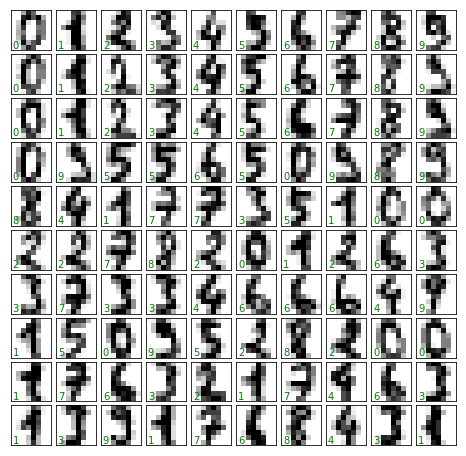

In [24]:
# plot the digits: each image is 8x8 pixels
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

We will assign the features data to X and the target (labels) to y:  

In [25]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


Note that there are 1,797 samples and 64 features.

1) Split the data into a training set (with 70% of the data) and a testing set. Name the variables `X_train, X_test, y_train, y_test`.  Display the size of `X_train`.

In [26]:
#your code:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size = 0.7)
print(X_train.shape)

(1257, 64)


We will apply different classification algorithms to the digits data.
- decision trees
- random forest method
- support-vector machine with linear kernel 

2) Classify the digits using the decision trees classifer. (Perform the "training" on the training set and make a prediction on the testing set (`X_test`) )

In [27]:
# your code:
# decision trees 
classify = tree.DecisionTreeClassifier()
classify.fit(X_train, y_train)
y_test_pred = classify.predict(X_test)

3) Display the classification report for this classifier.

In [28]:
print(metrics.classification_report(y_test,y_test_pred))

             precision    recall  f1-score   support

          0       0.98      0.93      0.95        54
          1       0.75      0.84      0.79        45
          2       0.88      0.91      0.89        55
          3       0.82      0.79      0.80        52
          4       0.80      0.93      0.86        57
          5       0.83      0.89      0.86        45
          6       0.98      0.96      0.97        57
          7       0.93      0.77      0.85        53
          8       0.79      0.71      0.75        59
          9       0.83      0.84      0.83        63

avg / total       0.86      0.86      0.86       540



4) Compute the "accuracy score" (`metrics.accuracy_score`) of the prediction on the testing set. The documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (Use only the first two arguments (`y_true` and `y_pred`) and leave everything else default).

In [29]:
print(metrics.accuracy_score(y_test,y_test_pred))

0.8574074074074074


5) Compute the confusion matrix for this classifier. Display the result.

In [30]:
print(metrics.confusion_matrix(y_test,y_test_pred))

[[50  0  1  0  1  1  0  0  0  1]
 [ 0 38  1  2  1  0  0  1  2  0]
 [ 0  1 50  0  0  1  0  0  2  1]
 [ 0  0  1 41  0  1  1  0  5  3]
 [ 0  1  0  0 53  1  0  0  1  1]
 [ 0  0  0  3  0 40  0  0  1  1]
 [ 0  2  0  0  0  0 55  0  0  0]
 [ 0  1  1  0  7  0  0 41  0  3]
 [ 0  6  2  3  3  1  0  1 42  1]
 [ 1  2  1  1  1  3  0  1  0 53]]


6) From the confusion matrix, answer the following questions:
- Is there any digit that was 100% correctly predicted?  If yes, what is it?
- How many samples of digit 8 were categorized as digit 1 ?
- What is the largest number of samples that were incorrectly classified?  What digit is it? 

(your answer): There was no digit that was 100% correctly predicted. Out of our samples, 6 were categorized as 1 digit. The largest number of samples that were incorrectly classified were the digit 7 being incorrectly classified as the digit 4 a total of 7 times.

7) Use the random forest classifer to perform the same task. 
- Perform the "training" on the training set and make a prediction on the testing set (`X_test`)
- Compute the "accuracy score"
- Display the confusion matrix

In [31]:
#your code: (random forest)
classify = ensemble.RandomForestClassifier()
classify.fit(X_train, y_train)
y_test_pred = classify.predict(X_test)
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

0.9444444444444444
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  2 52  0  0  0  0  0  1  0]
 [ 0  0  0 51  0  0  0  0  1  0]
 [ 0  0  0  0 57  0  0  0  0  0]
 [ 0  2  0  1  1 40  0  0  0  1]
 [ 0  1  0  0  0  0 55  0  1  0]
 [ 0  0  0  0  0  0  0 52  1  0]
 [ 0  6  0  3  0  1  0  0 49  0]
 [ 0  0  0  0  0  4  0  1  3 55]]


8) Use the support-vector machine (with 'linear' kernel) as the classifer.
- Perform the "training" on the training set and make a prediction on the testing set (`X_test`)
- Compute the "accuracy score"
- Display the confusion matrix

In [32]:
#your code: (svm)
classify = svm.SVC(kernel='linear')
classify.fit(X_train, y_train)
y_test_pred = classify.predict(X_test)
print(metrics.accuracy_score(y_test,y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))

0.9833333333333333
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  1  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  1]
 [ 0  0  0  0 57  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  1]
 [ 0  0  0  0  0  0 56  0  1  0]
 [ 0  0  0  0  1  0  0 52  0  0]
 [ 0  1  0  0  0  1  0  0 57  0]
 [ 0  0  0  0  0  1  0  0  1 61]]


9) Among these three classifiers, which one do you think does the best job at classifying digits?  Why?

answer: I think that the best of the three classifiers, would be the one that classifies the digits the most accurately, which would be the support-vector machine and linear kernal classifier. 

## Problem 2: Machine Learning - Clustering
We will still consider the handwritten digits data. (Note that we have saved the feature data in the variable `X` (we are not splitting the data into a training set and a testing set)).  We will try to identify similar digits without using the original label data (`y`). 

1) Perform K-means method on the data `X` and assign the prediction to the variable name `y_pred`

In [33]:
clusters = cluster.KMeans(n_clusters=10)
clusters.fit(X)
y_pred=clusters.predict(X)
print(y_pred)
print(y)

[0 1 1 ... 1 2 2]
[0 1 2 ... 8 9 8]


2) If you print out `y_pred` and `y` (the correct labels), you will see that although the label names don't match. Run the cell below to rename the elements in y_pred so that the labels match. 

In [34]:
from scipy.stats import mode
y_pred_labels = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred==i)
    y_pred_labels[mask] = mode(y[mask])[0]

3) Print out the classification report and the accuracy score.

In [35]:
print(metrics.accuracy_score(y,y_pred_labels))

0.7946577629382304


4) Print out the confusion matrix

In [36]:
print(metrics.confusion_matrix(y, y_pred_labels))

[[177   0   0   0   1   0   0   0   0   0]
 [  0  54  24   1   0   1   2   0 100   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   1 155   0   2   0   7   7  11]
 [  0   3   0   0 166   0   0  10   2   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   0   0   0   0   0 177   0   3   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   4   0   4   2   5 102  48]
 [  0  20   0   6   0   6   0   8   1 139]]


5) Which pair of digits is the most confusion? (In other words, which digit was incorrectly classified the most? (and classified as what digit?) )

your answer here: The pair of digits with the most confusion is 1 and 8, the 1 digit was accidently classified as 8. 

## Problem 3: R programming
(This problem is Exercise 2.4 from the lecture slide https://bilgcan.github.io/RBootcamp-Day1/) 
We will start by running the following code in R:
```
january <- matrix(1:31, nrow = 5, ncol = 7, byrow = T)
## Warning in matrix(1:31, nrow = 5, ncol = 7, byrow = T): data length [31] is
## not a sub-multiple or multiple of the number of rows [5]
colnames(january) <- c("monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday")
rownames(january) <- c("week 1", "week 2", "week 3", "week 4", "week 5")

```
We've just created a matrix and assigned names to the rows and the columns.
Do the following (for each one, copy and paste your code and result in between the triple quotes in the Markdown cell below):

1) Remove Saturday and Sunday columns from January

Your code:
```
january <- subset(january,select=monday:friday); january
```
Your result:
```
       monday tuesday wednesday thursday friday
week 1      1       2         3        4      5
week 2      8       9        10       11     12
week 3     15      16        17       18     19
week 4     22      23        24       25     26
week 5     29      30        31        1      2
```

2) You called in sick from 9th to 11th. Replace those days in the matrix with "sick". How has the other entries in the matrix changed?

Your code:
```
january[january=c(7,12,17)] <- 'sick'; january

```
Your result:
```
       monday tuesday wednesday thursday friday
week 1 "1"    "2"     "3"       "4"      "5"   
week 2 "8"    "sick"  "sick"    "sick"   "12"  
week 3 "15"   "16"    "17"      "18"     "19"  
week 4 "22"   "23"    "24"      "25"     "26"  
week 5 "29"   "30"    "31"      "1"      "2"  

```
Your answer to the question:
The other entries are now strings. 

3) Replace the remaining days with "healthy"

Your code:
```
january[january!='sick'] <- 'healthy'; january
```
Your result:
```
       monday    tuesday   wednesday thursday  friday   
week 1 "healthy" "healthy" "healthy" "healthy" "healthy"
week 2 "healthy" "sick"    "sick"    "sick"    "healthy"
week 3 "healthy" "healthy" "healthy" "healthy" "healthy"
week 4 "healthy" "healthy" "healthy" "healthy" "healthy"
week 5 "healthy" "healthy" "healthy" "healthy" "healthy"
```

4) What do you get when you use length() on a matrix? Use also nrow() and ncol() on the same matrix. How are they related to length?

Your code:
```
length(january)
nrow(january)
ncol(january)

```
Your result:
```
25
5
5
```
Your answer to the question:
The length is equal to the number of rows times the number of columns. 
